In [1]:
# Incorporate point-correlation
def correlation_fun(xx,input_dim,Rad):
    sum_store=[]
    for ii in range(xx.shape[0]):
        x = xx[ii]
        point_corr=0
        
        for i in range(input_dim):
            for j in range(input_dim):
                point_corr_temp1=tf.multiply(x[i,j],x[i,tf.mod(j+Rad,input_dim)])
                point_corr=tf.add(point_corr_temp1,point_corr)

        for i in range(input_dim):
            for j in range(input_dim):           
                point_corr_temp2=tf.multiply(x[i,j],x[tf.mod(i+Rad,input_dim),j])
                point_corr=tf.add(point_corr_temp2,point_corr)
        
        sum_store = tf.concat([sum_store, (point_corr+2*input_dim**2)/4./1],0)
    return sum_store

In [2]:
def correlation_fun_test(xx,input_dim,Rad):
    sum_store=[]
    for ii in range(len(xx)):
        x = xx[ii]
        point_corr=0
#     if Rad <=50:
        for i in range(input_dim):
            for j in range(input_dim):
                point_corr_temp1=(x[i,j]*x[i,np.mod(j+Rad,input_dim)])
                point_corr=point_corr_temp1+point_corr

        for i in range(input_dim):
            for j in range(input_dim):
                point_corr_temp2=x[i,j]*x[np.mod(i+Rad,input_dim),j]
                point_corr=(point_corr_temp2+point_corr)
        sum_store.append((point_corr+2*input_dim**2)/4.)
#     print(point_corr)
    return sum_store

In [3]:
# Incorporate point-correlation
def correlation_fun_angle(xx,input_dim,Rad):
    sum_store=[]
    for ii in range(xx.shape[0]):
        x = xx[ii]
        point_corr=0
        
        for i in range(input_dim):
            for j in range(input_dim):
                point_corr_temp1=tf.multiply(x[i,j],x[np.mod(i+Rad,input_dim),np.mod(j+Rad,input_dim)])
                point_corr=tf.add(point_corr_temp1,point_corr)
        
        sum_store = tf.concat([sum_store, (point_corr+2*input_dim**2)/4./1],0)
    return sum_store

In [4]:
def correlation_fun_angle_test(xx,input_dim,Rad):
    sum_store=[]
    for ii in range(len(xx)):
        x = xx[ii]
        point_corr=0
        for i in range(input_dim):
            for j in range(input_dim):
                point_corr_temp1=(x[i,j]*x[np.mod(i+Rad,input_dim),np.mod(j+Rad,input_dim)])
                point_corr=point_corr_temp1+point_corr
        sum_store.append((point_corr+2*input_dim**2)/4.)
#     print(point_corr)
    return sum_store

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import scipy.io as sio
# from torch.autograd import Variable
from tensorflow.examples.tutorials.mnist import input_data



# mnist = input_data.read_data_sets('../../MNIST_data', one_hot=True)
images = np.array(sio.loadmat('WB_test64_GAN_sm2.mat')['WB_sm'],dtype='float32')
images[images==0]=-1
images=images[0:10]

mb_size = 5
z_dim = 8
X_dim = images.shape[1]
width = 32
hight = 32
h_dim = 8*8
input_dim = 32
Rad = input_dim/2

conv1_features=64
conv2_features=32
conv3_features=1
c = 0

num_channels_1=1
num_channels_2=64
num_channels_3=32
lr = 1e-3

VF0 = []
for i in range(10):
    VF0 = np.append(VF0, correlation_fun_test(xx=images[i].reshape(1,32,32),input_dim=32,Rad=16))
print('VF0=',VF0)
y_target0=np.mean(VF0)

VF00 = []
for i in range(10):
    VF00 = np.append(VF00, correlation_fun_angle_test(xx=images[i].reshape(1,32,32),input_dim=32,Rad=16))
print('VF00=',VF00)
y_target00=np.mean(VF00)

VF1 = []
for i in range(10):
    VF1 = np.append(VF1, correlation_fun_test(xx=images[i].reshape(1,32,32),input_dim=32,Rad=1))
print('VF1=',VF1)
y_target1=np.mean(VF1)

VF10 = []
for i in range(10):
    VF10 = np.append(VF10, correlation_fun_angle_test(xx=images[i].reshape(1,32,32),input_dim=32,Rad=1))
print('VF10=',VF10)
y_target10=np.mean(VF10)

VF2 = []
for i in range(10):
    VF2 = np.append(VF2, correlation_fun_test(xx=images[i].reshape(1,32,32),input_dim=32,Rad=3))
print('VF2=',VF2)
y_target2=np.mean(VF2)

VF20 = []
for i in range(10):
    VF20 = np.append(VF20, correlation_fun_angle_test(xx=images[i].reshape(1,32,32),input_dim=32,Rad=3))
print('VF20=',VF20)
y_target20=np.mean(VF20)

VF3 = []
for i in range(10):
    VF3 = np.append(VF3, correlation_fun_test(xx=images[i].reshape(1,32,32),input_dim=32,Rad=6))
print('VF3=',VF3)
y_target3=np.mean(VF3)

VF30 = []
for i in range(10):
    VF30 = np.append(VF30, correlation_fun_angle_test(xx=images[i].reshape(1,32,32),input_dim=32,Rad=6))
print('VF30=',VF30)
y_target30=np.mean(VF30)


def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(32, 32), cmap='Greys_r')

    return fig


def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)


# =============================== Q(z|X) ======================================

# X = tf.placeholder(tf.float32, shape=[None, X_dim])
zz = tf.placeholder(tf.float32, shape=[None, z_dim])
z0 = tf.placeholder(tf.float32, shape=[None, z_dim])

x_input_shape = (mb_size, width, hight, num_channels_1)
X = tf.placeholder(tf.float32, shape=x_input_shape)
y0 = tf.placeholder(tf.float32, None)
y1 = tf.placeholder(tf.float32, None)
y2 = tf.placeholder(tf.float32, None)
y3 = tf.placeholder(tf.float32, None)
y00= tf.placeholder(tf.float32, None)
y10= tf.placeholder(tf.float32, None)
y20= tf.placeholder(tf.float32, None)
y30= tf.placeholder(tf.float32, None)

Q_W1 = tf.Variable(xavier_init([X_dim, h_dim]))
Q_b1 = tf.Variable(tf.zeros(shape=[h_dim]))

Q_W2_mu = tf.Variable(xavier_init([h_dim, z_dim]))
Q_b2_mu = tf.Variable(tf.zeros(shape=[z_dim]))

Q_W2_sigma = tf.Variable(xavier_init([h_dim, z_dim]))
Q_b2_sigma = tf.Variable(tf.zeros(shape=[z_dim]))


def Q(X):   
    h = tf.nn.relu(tf.matmul(tf.reshape(X,[mb_size,X_dim]), Q_W1) + Q_b1)
    z_mu = tf.matmul(h, Q_W2_mu) + Q_b2_mu
    z_logvar = tf.matmul(h, Q_W2_sigma) + Q_b2_sigma
    return z_mu, z_logvar

def sample_z(mu, log_var):
    eps = tf.random_normal(shape=tf.shape(mu))
    return mu + tf.exp(log_var / 2) * eps


# =============================== P(X|z) ======================================

P_W1 = tf.Variable(xavier_init([z_dim, h_dim]))
P_b1 = tf.Variable(tf.zeros(shape=[h_dim]))

# P_W2 = tf.Variable(xavier_init([h_dim, X_dim]))
# P_b2 = tf.Variable(tf.zeros(shape=[X_dim]))

deconv1_weight = tf.Variable(tf.truncated_normal([4, 4, conv1_features, num_channels_1],
                                               stddev=0.1, dtype=tf.float32))
deconv1_bias = tf.Variable(tf.zeros([conv1_features], dtype=tf.float32))

deconv2_weight = tf.Variable(tf.truncated_normal([4, 4, conv2_features,num_channels_2],
                                               stddev=0.1, dtype=tf.float32))
deconv2_bias = tf.Variable(tf.zeros([conv2_features], dtype=tf.float32))

deconv3_weight = tf.Variable(tf.truncated_normal([4, 4, conv3_features, num_channels_3],
                                               stddev=0.1, dtype=tf.float32))
deconv3_bias = tf.Variable(tf.zeros([conv3_features], dtype=tf.float32))



def P(zz):
    h1 = tf.nn.relu(tf.matmul(zz, P_W1) + P_b1)
    h2 = tf.nn.relu(tf.add(tf.nn.conv2d_transpose(tf.reshape(h1,[mb_size, width/4, hight/4, 1]), 
                                                  deconv1_weight, strides=[1, 2, 2, 1], padding='SAME',
                                       output_shape=[mb_size, width/2, hight/2, conv1_features]),deconv1_bias))
    
    h3 = tf.nn.relu(tf.add(tf.nn.conv2d_transpose(tf.reshape(h2,[mb_size, width/2, hight/2, conv1_features]), 
                                                  deconv2_weight, strides=[1, 2, 2, 1], padding='SAME',
                                       output_shape=[mb_size, width/1, hight/1, conv2_features]),deconv2_bias))
    
    h4 = (tf.add(tf.nn.conv2d_transpose(tf.reshape(h3,[mb_size, width/1, hight/1, conv2_features]), 
                                                  deconv3_weight, strides=[1, 1, 1, 1], padding='SAME',
                                       output_shape=[mb_size, width/1, hight/1, conv3_features]),deconv3_bias))
    
    prob = tf.nn.tanh(h4)
    return prob


# =============================== TRAINING ====================================
with tf.device('/cpu:0'):
    z_mu, z_logvar = Q(X)
    z_sample = sample_z(z_mu, z_logvar)
    prob = P(z_sample)

    # Sampling from random z
    X_samples  = P(zz)
    X_samples0 = P(z0)


    # point correlation loss
    PC_ori=correlation_fun(X, input_dim=input_dim, Rad=Rad)
    PC_rec=correlation_fun(prob, input_dim=input_dim, Rad=Rad)

    PC_ran_temp = correlation_fun(xx=X_samples0,input_dim=input_dim, Rad=Rad)
    PC_ran_temp1= correlation_fun(xx=X_samples0,input_dim=input_dim, Rad=1)
    PC_ran_temp2= correlation_fun(xx=X_samples0,input_dim=input_dim, Rad=3)
    PC_ran_temp3= correlation_fun(xx=X_samples0,input_dim=input_dim, Rad=6)
    PC_ran_temp00= correlation_fun_angle(xx=X_samples0,input_dim=input_dim, Rad=Rad)
    PC_ran_temp10= correlation_fun_angle(xx=X_samples0,input_dim=input_dim, Rad=1)
    PC_ran_temp20= correlation_fun_angle(xx=X_samples0,input_dim=input_dim, Rad=3)
    PC_ran_temp30= correlation_fun_angle(xx=X_samples0,input_dim=input_dim, Rad=6)

    PC_ran = PC_ran_temp
    PC_ran1= PC_ran_temp1
    PC_ran2= PC_ran_temp2
    PC_ran3= PC_ran_temp3
    PC_ran00= PC_ran_temp00
    PC_ran10= PC_ran_temp10
    PC_ran20= PC_ran_temp20
    PC_ran30= PC_ran_temp30


    PC_loss0=tf.reduce_mean(tf.square(y0-PC_ran))
    PC_loss1=tf.reduce_mean(tf.square(y1-PC_ran1))
    PC_loss2=tf.reduce_mean(tf.square(y2-PC_ran2))
    PC_loss3=tf.reduce_mean(tf.square(y3-PC_ran3))
    PC_loss00=tf.reduce_mean(tf.square(y00-PC_ran00))
    PC_loss10=tf.reduce_mean(tf.square(y10-PC_ran10))
    PC_loss20=tf.reduce_mean(tf.square(y20-PC_ran20))
    PC_loss30=tf.reduce_mean(tf.square(y30-PC_ran30))

    # E[log P(X|z)]
    recon_loss = tf.reduce_sum(tf.square((tf.reshape(prob,[mb_size, X_dim])-tf.reshape(X,[mb_size, X_dim]))))/4.
    # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
    kl_loss = tf.reduce_mean(0.5 * tf.reduce_sum(tf.exp(z_logvar) + z_mu**2 - 1. - z_logvar, 1))

    # VAE loss
    vae_loss = tf.reduce_mean(recon_loss + kl_loss + PC_loss0 + PC_loss1 + PC_loss2 + PC_loss3 + PC_loss00 + PC_loss10 + PC_loss20 + PC_loss30)

    solver = tf.train.AdamOptimizer().minimize(vae_loss)

    saver = tf.train.Saver()

    sess = tf.Session()

    sess.run(tf.global_variables_initializer())

    if not os.path.exists('out/'):
        os.makedirs('out/')

    i = 0
    PC_ori=[]


    for it in range(30000):
        X_mb = images[(it*mb_size)%10:(it*mb_size)%10+mb_size]
    #     PC_ori = tf.reduce_mean(tf.concat([PC_ori, PC_ori_temp],0))
        z = np.random.randn(mb_size, z_dim)
    #     print((it*10)%100,(it*10)%100+mb_size)
        _, loss, recon_E, kl_E,PC_E0,PC_E1, PC_E2,PC_E3,PC_E00,PC_E10,PC_E20,PC_E30 = sess.run([solver, vae_loss, recon_loss, kl_loss,PC_loss0,PC_loss1, PC_loss2,PC_loss3, PC_loss00, PC_loss10, PC_loss20, PC_loss30], 
                                                        feed_dict={X: X_mb.reshape(mb_size, width, hight, num_channels_1),
                                                                  z0: z.reshape(mb_size,z_dim),
                                                                  y0: y_target0,
                                                                  y1: y_target1,
                                                                  y2: y_target2,
                                                                  y3: y_target3,
                                                                  y00:y_target00,
                                                                  y10:y_target10,
                                                                  y20:y_target20,
                                                                  y30:y_target30})

        if recon_E <= 80:
            print('Optimization is done')
            print('Iter: {}'.format(it))
            print('Loss: {}'.format(loss))
            print('recon_E:{}'.format(recon_E))
            print('kl_E:{}'.format(kl_E))
            print('PC_E0:{}'.format(PC_E0))
            print('PC_E1:{}'.format(PC_E1))
            print('PC_E2:{}'.format(PC_E2))
            print('PC_E3:{}'.format(PC_E3))
            print('PC_E00:{}'.format(PC_E00))
            print('PC_E10:{}'.format(PC_E10))            
            print('PC_E20:{}'.format(PC_E20))
            print('PC_E30:{}'.format(PC_E30)) 
            print()
            break

        if it % 1000 == 0:
            print('Iter: {}'.format(it))
            print('Loss: {}'.format(loss))
            print('recon_E:{}'.format(recon_E))
            print('kl_E:{}'.format(kl_E))
            print('PC_E0:{}'.format(PC_E0))
            print('PC_E1:{}'.format(PC_E1))
            print('PC_E2:{}'.format(PC_E2))
            print('PC_E3:{}'.format(PC_E3))
            print('PC_E00:{}'.format(PC_E00))
            print('PC_E10:{}'.format(PC_E10))
            print('PC_E20:{}'.format(PC_E20))
            print('PC_E30:{}'.format(PC_E30))            
            print()

            samples0 = sess.run(X_samples, feed_dict={zz: z.reshape(mb_size,z_dim)})      

            fig0 = plot(samples0)
            k=0
            plt.savefig('out/{}-{}.png'.format(str(i).zfill(3),str(k).zfill(3)), bbox_inches='tight')
    #         fig1 = plot(samples1)
            i += 1
    #         plt.close(fig)
    # save_path = saver.save(sess, "/tmp/model.ckpt")

('VF0=', array([ 648.,  542.,  516.,  642.,  532.,  546.,  532.,  624.,  494.,  600.]))
('VF00=', array([ 597.,  512.,  522.,  560.,  516.,  497.,  516.,  575.,  560.,  555.]))
('VF1=', array([ 775.,  732.,  696.,  768.,  739.,  718.,  751.,  743.,  754.,  777.]))
('VF10=', array([ 680.,  592.,  492.,  546.,  687.,  522.,  622.,  516.,  559.,  637.]))
('VF2=', array([ 558.,  555.,  454.,  554.,  459.,  458.,  566.,  539.,  596.,  597.]))
('VF20=', array([ 591.,  541.,  526.,  527.,  613.,  514.,  516.,  524.,  514.,  531.]))
('VF3=', array([ 607.,  563.,  521.,  555.,  577.,  500.,  580.,  508.,  583.,  568.]))
('VF30=', array([ 536.,  535.,  517.,  576.,  556.,  515.,  521.,  498.,  538.,  513.]))
Iter: 0
Loss: 66447.3984375
recon_E:1610.19470215
kl_E:20.5716609955
PC_E0:2384.86474609
PC_E1:53179.4609375
PC_E2:390.966461182
PC_E3:1455.85424805
PC_E00:655.588134766
PC_E10:5659.47900391
PC_E20:832.150695801
PC_E30:258.264221191
()
Iter: 1000
Loss: 2691.22485352
recon_E:1449.98095703
kl_

KeyboardInterrupt: 

In [140]:
save_path = saver.save(sess, "/tmp/model.ckpt")

In [1]:
import tensorflow as tf
saver = tf.train.Saver()
saver.restore(sess, "/tmp/model.ckpt")
# save_path = saver.save(sess, "/tmp/model.ckpt")

ValueError: No variables to save

In [ ]:
def plot(samples):
    fig = plt.figure(figsize=(10, 10))
    gs = gridspec.GridSpec(1, 5)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(32, 32), cmap='Greys_r')

X_mb=images[0:mb_size]
z_temp=sess.run(z_mu, feed_dict={X:X_mb.reshape(mb_size, width, hight, num_channels_1)})
%matplotlib inline
sample_temp=sess.run(X_samples, feed_dict={zz: z_temp[0:mb_size]})
# plot_new(sample_temp)
plot(sample_temp)

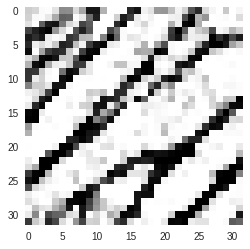

In [136]:
plt.imshow(sample_temp[3].reshape(32,32),'gray')
plt.grid(False)

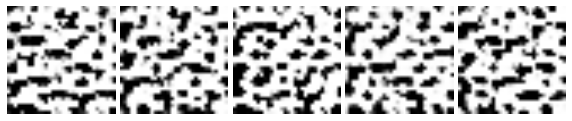

In [41]:
def plot(samples):
    fig = plt.figure(figsize=(10, 10))
    gs = gridspec.GridSpec(1, 5)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(32, 32), cmap='Greys_r')

#     return fig
samples = sess.run(X_samples, feed_dict={zz: np.random.randn(mb_size, z_dim)})
sample_sort=samples.reshape(-1)
# sample_sort.sort()
# samples[samples>=(np.sort(sample_sort))[300]]=1
# samples[samples<(np.sort(sample_sort))[300]]=-1
plot(samples)

In [5]:
VF_pred = []
for i in range(10):
    samples=sess.run(X_samples, feed_dict={zz: z[i].reshape(1,z_dim)})
    VF_pred = np.append(VF_pred, correlation_fun_test(x=samples.reshape(32,32),input_dim=32,Rad=16))
    plt.hist(samples.reshape(-1))
print('VF_pred=',VF_pred)

InvalidArgumentError: Input to reshape is a tensor with 64 values, but the requested shape has 320
	 [[Node: Reshape_4 = Reshape[T=DT_FLOAT, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/cpu:0"](Relu_4, Reshape_4/shape)]]

Caused by op u'Reshape_4', defined at:
  File "/home/doi4/Downloads/ENTER/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/doi4/Downloads/ENTER/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/doi4/Downloads/ENTER/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/doi4/Downloads/ENTER/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/doi4/Downloads/ENTER/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/doi4/Downloads/ENTER/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/doi4/Downloads/ENTER/lib/python2.7/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/doi4/Downloads/ENTER/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/doi4/Downloads/ENTER/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/doi4/Downloads/ENTER/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/doi4/Downloads/ENTER/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/doi4/Downloads/ENTER/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/doi4/Downloads/ENTER/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/doi4/Downloads/ENTER/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/doi4/Downloads/ENTER/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/doi4/Downloads/ENTER/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/doi4/Downloads/ENTER/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/doi4/Downloads/ENTER/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/doi4/Downloads/ENTER/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/doi4/Downloads/ENTER/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-3830befd02bf>", line 145, in <module>
    X_samples  = P(zz)
  File "<ipython-input-3-3830befd02bf>", line 122, in P
    h2 = tf.nn.relu(tf.add(tf.nn.conv2d_transpose(tf.reshape(h1,[mb_size, width/4, hight/4, 1]),
  File "/home/doi4/Downloads/ENTER/lib/python2.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2630, in reshape
    name=name)
  File "/home/doi4/Downloads/ENTER/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/home/doi4/Downloads/ENTER/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2327, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/doi4/Downloads/ENTER/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1226, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Input to reshape is a tensor with 64 values, but the requested shape has 320
	 [[Node: Reshape_4 = Reshape[T=DT_FLOAT, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/cpu:0"](Relu_4, Reshape_4/shape)]]


In [9]:
S2 = np.zeros([2*mb_size,17])
for i in range(2):
    samples=sess.run(X_samples, feed_dict={zz: np.random.randn(mb_size, z_dim)})
    for j in range(17):
        S2[i*mb_size:(i+1)*mb_size,j] = correlation_fun_test(xx=samples,input_dim=32,Rad=j)
#     plt.hist(samples.reshape(-1))

S2_ori = np.zeros([2*mb_size,17])
for i in range(2):
    for j in range(17):
        sample_ori=images[i*mb_size:(i+1)*mb_size].reshape(mb_size,32,32,1)
        S2_ori[i*mb_size:(i+1)*mb_size,j] = correlation_fun_test(xx=sample_ori,input_dim=32,Rad=j)

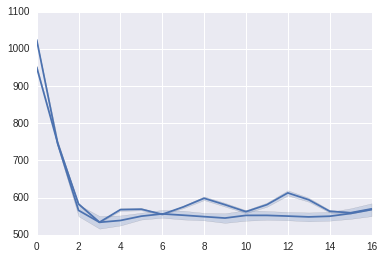

In [12]:
import seaborn as sns
%matplotlib inline
x = np.linspace(0, 16, 17)
sns.tsplot(data=S2)
sns.tsplot(data=S2_ori)

In [15]:
samples=sess.run(X_samples, feed_dict={zz: np.random.randn(mb_size, z_dim)})
samples.shape

(5, 32, 32, 1)

In [19]:
S2_angle = np.zeros([2*mb_size,17])
for i in range(2):
    samples=sess.run(X_samples, feed_dict={zz: np.random.randn(mb_size, z_dim)})
    for j in range(17):
        S2_angle[i*mb_size:(i+1)*mb_size,j] = correlation_fun_angle_test(xx=samples,input_dim=32,Rad=j)
#     plt.hist(samples.reshape(-1))

S2_angle_ori = np.zeros([2*mb_size,17])
for i in range(2):
    for j in range(17):
        sample_ori=images[i*mb_size:(i+1)*mb_size].reshape(mb_size,32,32,1)
        S2_angle_ori[i*mb_size:(i+1)*mb_size,j] = correlation_fun_angle_test(xx=sample_ori,input_dim=32,Rad=j)

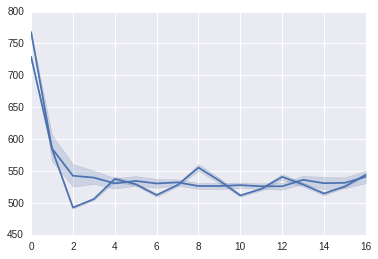

In [20]:
import seaborn as sns
%matplotlib inline
x = np.linspace(0, 16, 17)
sns.tsplot(data=S2_angle)
sns.tsplot(data=S2_angle_ori)

In [64]:
weight1 = sess.run(deconv1_weight)
weight2 = sess.run(deconv2_weight)
weight3 = sess.run(deconv3_weight)

In [65]:
import scipy.io as sio
sio.savemat('weight1.mat',mdict={'weight1':weight1})
sio.savemat('weight2.mat',mdict={'weight2':weight2})
sio.savemat('weight3.mat',mdict={'weight3':weight3})

In [28]:
z_temp=sess.run(z_mu, feed_dict={X:X_mb.reshape(mb_size, width, hight, num_channels_1)})
z_temp.shape
sample_temp=sess.run(X_samples, feed_dict={zz: z_temp[0:mb_size]})

(array([ 1.,  0.,  2.,  2.,  0.,  8.,  6.,  9.,  9.,  3.]),
 array([-1.98140526, -1.62520199, -1.26899872, -0.91279545, -0.55659218,
        -0.20038891,  0.15581436,  0.51201763,  0.8682209 ,  1.22442417,
         1.58062744]),
 <a list of 10 Patch objects>)

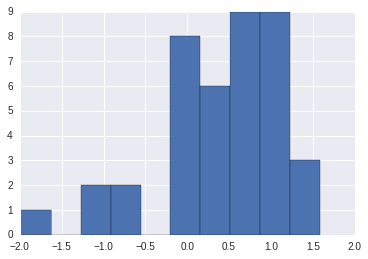

In [29]:
plt.hist(z_temp.reshape(-1))

In [37]:
test1=z_temp

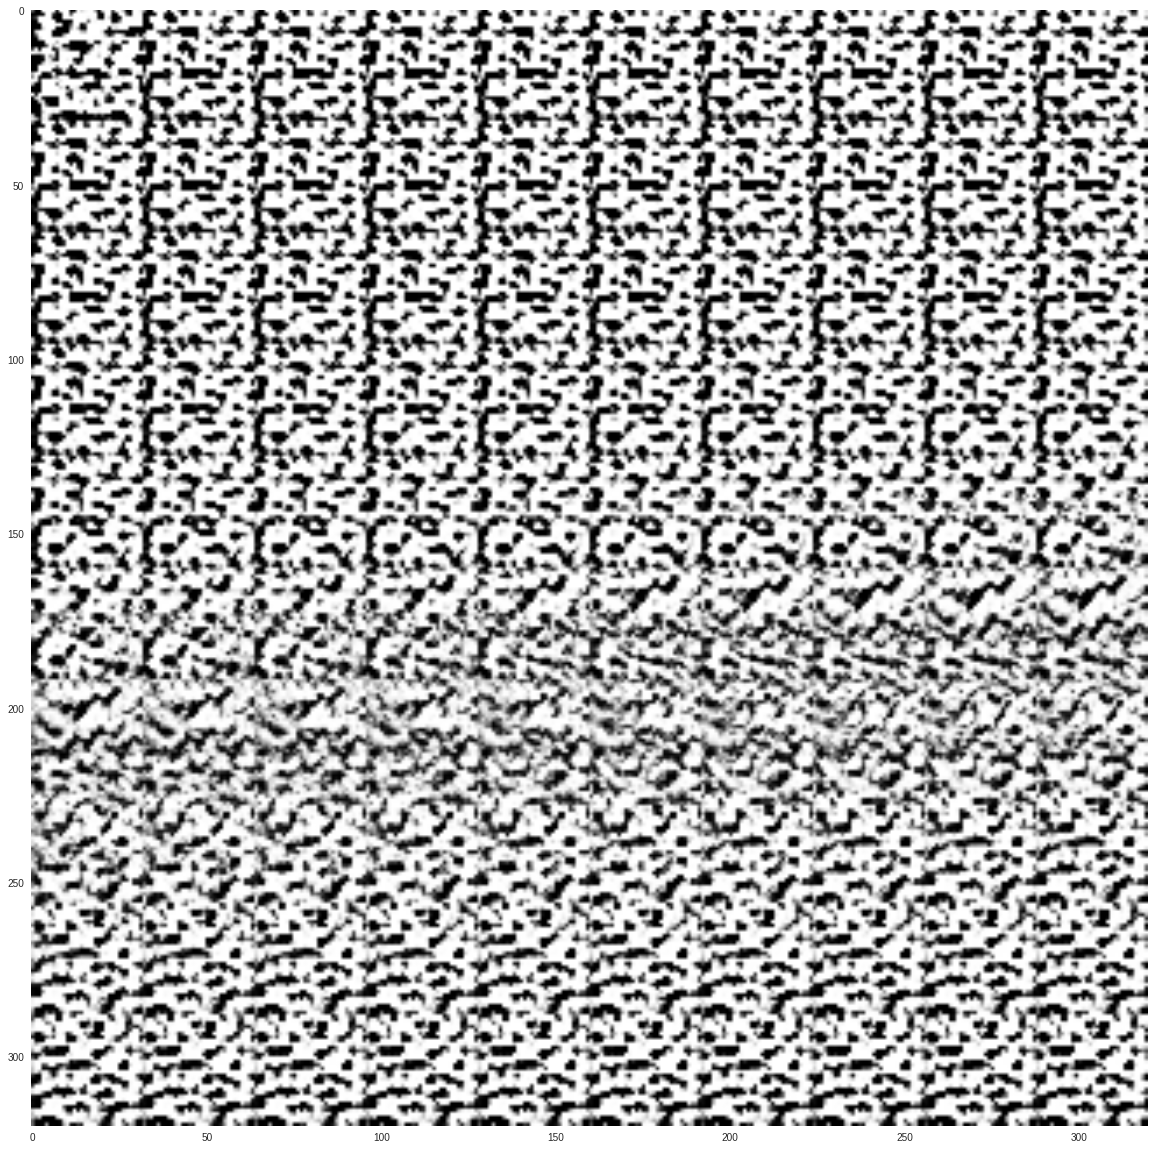

In [39]:
import matplotlib.pyplot as plt
n = 10  # figure with 15x15 digits
digit_size = 32
figure = np.zeros((digit_size * n, digit_size * n))
# we will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-2, 2, n)
grid_y = np.linspace(-2, 2, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        xi=np.linspace(-2, 2, 100)[k];k=k+1
        z_sample = np.array([[test1[0][1],xi,test1[0][2],test1[0][3],test1[0][4],test1[0][5],test1[0][6],test1[0][7]]]) 
        z_temp[0] = z_sample
        x_decoded = (sess.run(X_samples, feed_dict={zz: z_temp}))
        digit = x_decoded[0].reshape(digit_size, digit_size)
        
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(20, 20))
plt.grid(False)
plt.imshow(figure,'gray')
plt.show()

In [121]:
print z_temp[0]
print z_temp[3]

[-0.69910955 -0.23370448 -0.60818291 -2.2939465   0.12900056 -0.09631071
  0.37860024  0.87993389]
[-0.19493546  0.87740237 -0.16045441 -1.85800076 -0.11069743 -0.0186783
 -0.10337479  0.42082503]


In [13]:
grid=np.zeros([8,100])
nn=100
for i in range(8):
    grid[i] = np.linspace(z_temp[0][i], z_temp[3][i], nn)

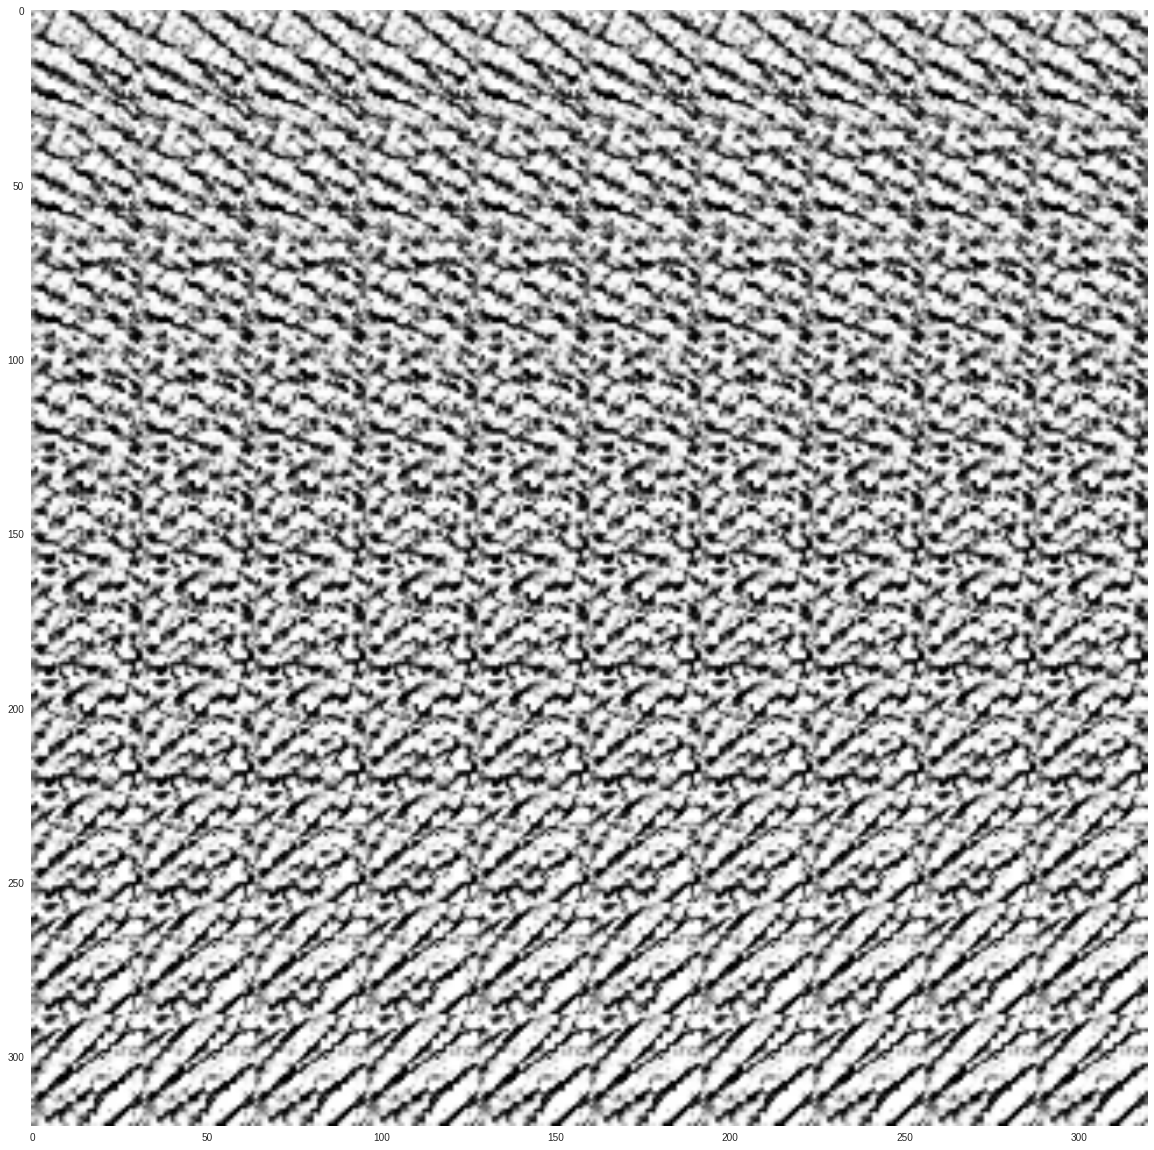

In [14]:
import matplotlib.pyplot as plt
n = 10  # figure with 15x15 digits
digit_size = 32
figure = np.zeros((digit_size * n, digit_size * n))
# we will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-4, 4, n)
grid_y = np.linspace(-4, 4, n)
k=0
x_decoded_store=np.zeros([100,digit_size**2])
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = grid[:,k]
        z_temp[1] = z_sample
        x_decoded = (sess.run(X_samples, feed_dict={zz: z_temp}))
        digit = x_decoded[1].reshape(digit_size, digit_size)
        
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit
        
        x_decoded_store[k]=digit.reshape(-1)
        k=k+1
        
plt.figure(figsize=(20, 20))
plt.grid(False)
plt.imshow(figure,'gray')
plt.show()

In [137]:
grid=np.zeros([8,500])
nn=500
for i in range(8):
    grid[i] = np.linspace(z_temp[0][i], z_temp[4][i], nn)

In [138]:
import matplotlib.pyplot as plt
n = 10  # figure with 15x15 digits
digit_size = 32
# we will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-4, 4, n)
grid_y = np.linspace(-4, 4, n)
k=0
x_decoded_store=np.zeros([500,digit_size**2])
for k in range(500):
    z_sample = grid[:,k]
    z_temp[1] = z_sample
    x_decoded = (sess.run(X_samples, feed_dict={zz: z_temp}))
    digit = x_decoded[1].reshape(digit_size, digit_size)
    x_decoded_store[k]=digit.reshape(-1)

In [96]:
grid[:,10]

array([-0.19493546,  0.87740237, -0.16045441, -1.85800076, -0.11069743,
       -0.0186783 , -0.10337479,  0.42082503])

In [139]:
sio.savemat('x_decoded_store.mat',mdict={'x_decoded_store':x_decoded_store})
